<a href="https://colab.research.google.com/github/krvamsi96/CIFAR-10--Image-classification/blob/master/image_classification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

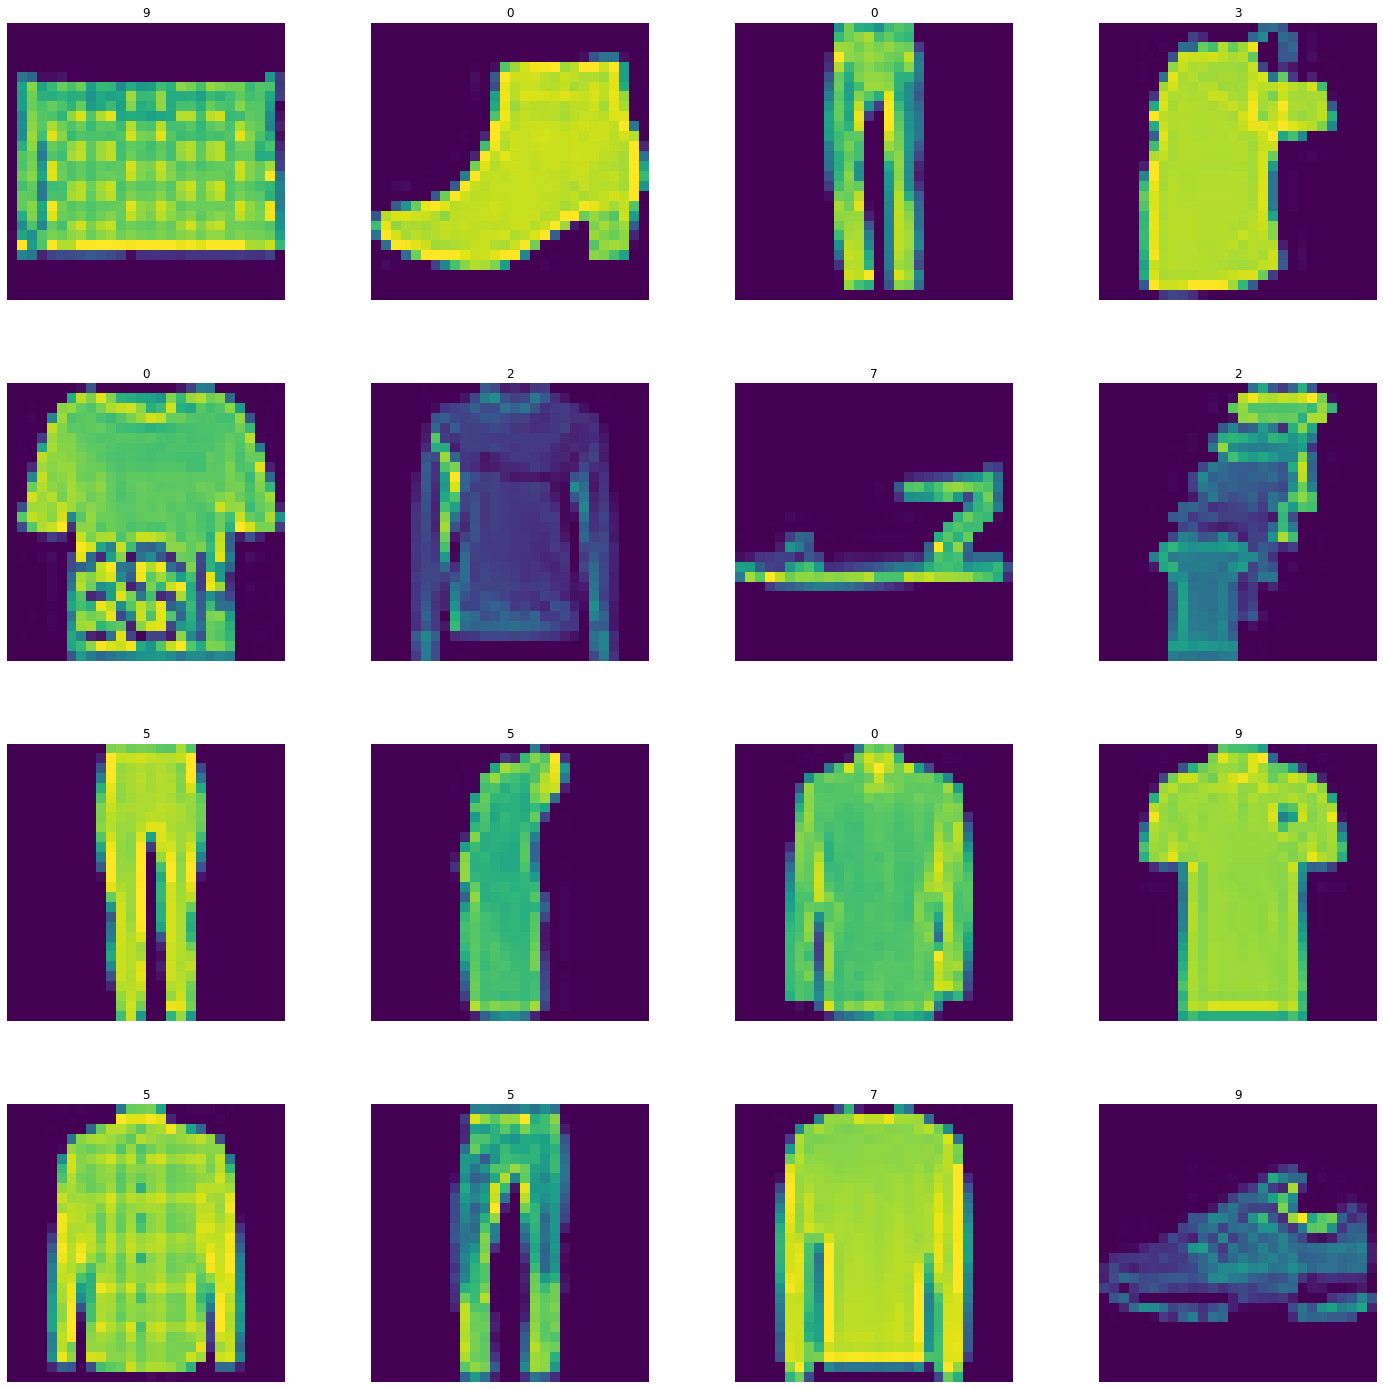

In [6]:
L_grid=4
W_grid=4
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(x_train)
import random
for i in range(0,L_grid*W_grid):
  index=random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[i])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)  

In [7]:
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6374 - accuracy: 0.7764
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3839 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3351 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3188 - accuracy: 0.8833
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2904 - accuracy: 0.8948
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2813 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.9029
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [15]:
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [16]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm=confusion_matrix(y_test,y_pred)

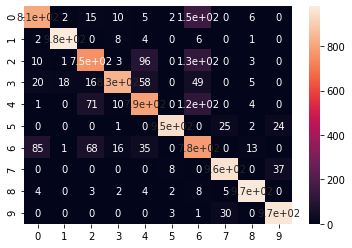

In [19]:
import seaborn as sns
sns.heatmap(cm,annot=True)

In [20]:
from sklearn.metrics import  accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.8789

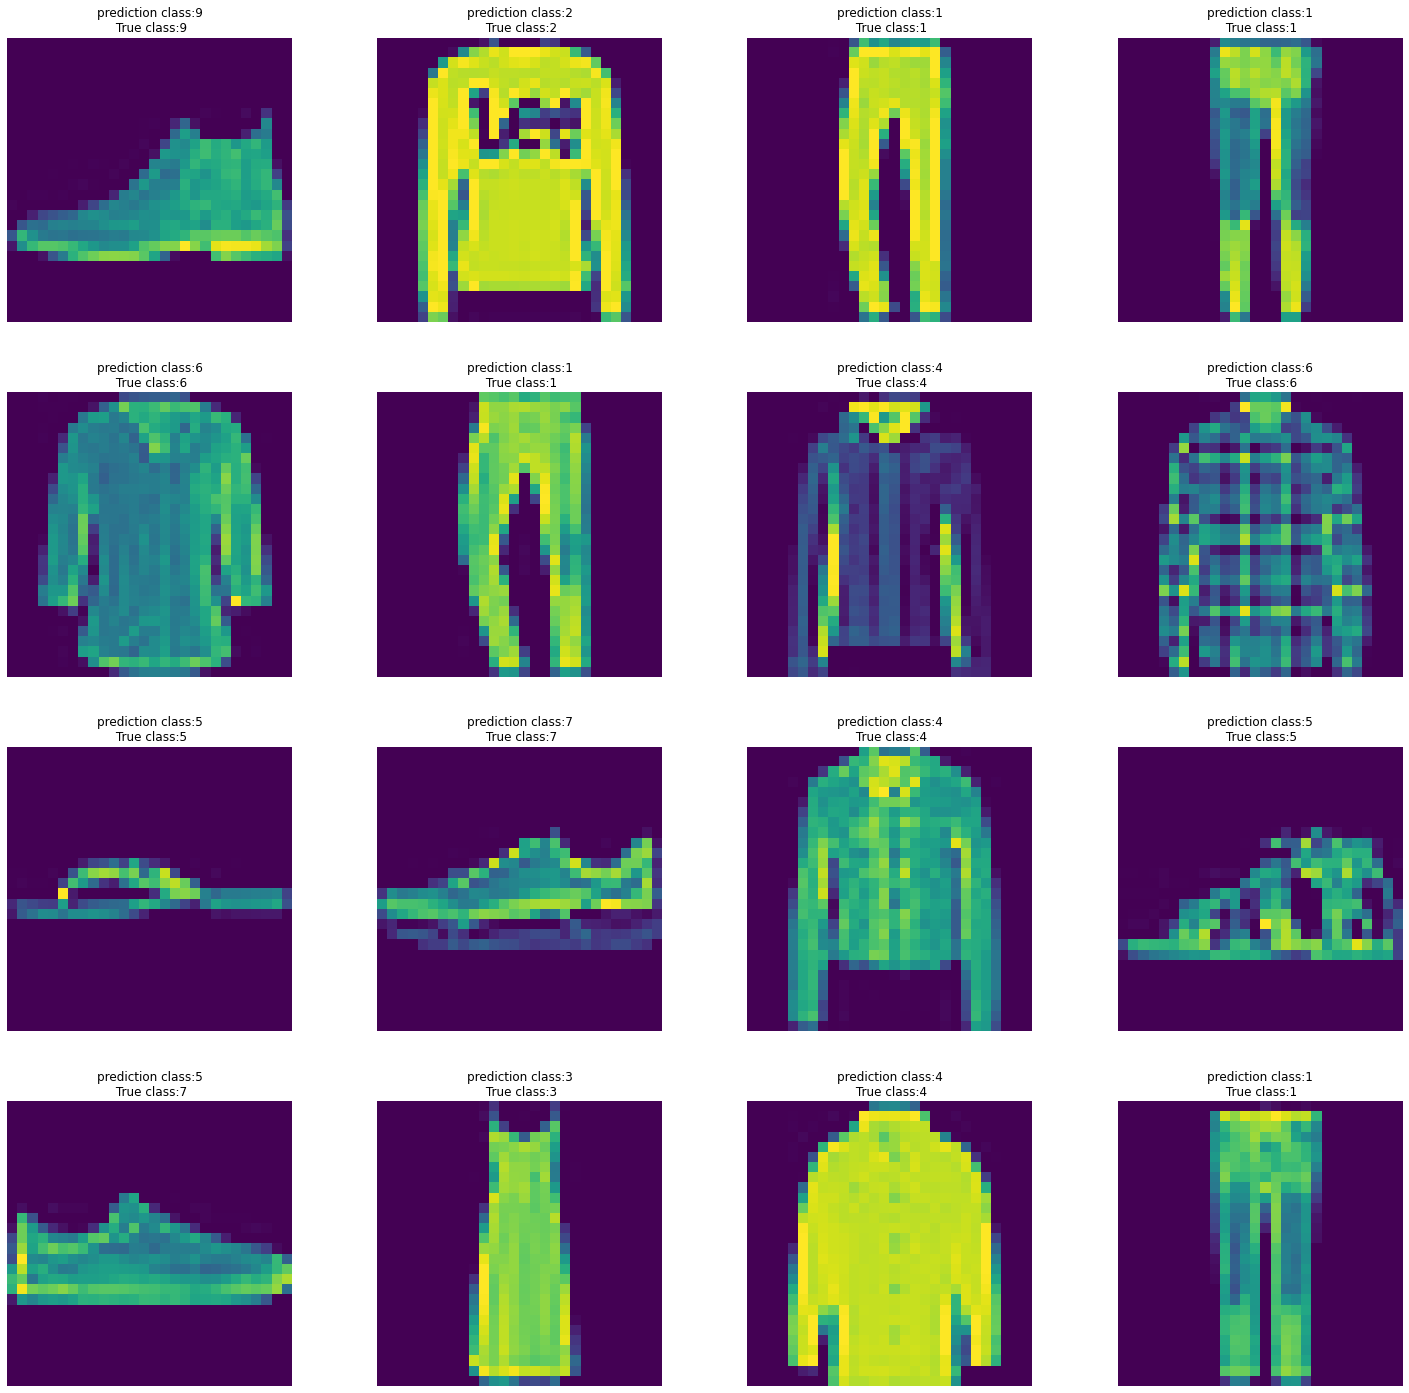

In [22]:
l=4
w=4
fig,axes=plt.subplots(l,w,figsize=(25,25))
axes=axes.ravel()

n_test=len(x_test)
for i in range(0,l*w):
  index=random.randint(0,n_test)
  axes[i].imshow(tf.squeeze(x_test[i]))
  axes[i].set_title('prediction class:{}\n True class:{}'.format(y_pred[i],y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)  